In [1]:
import torch
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import DataLoader
from torchvision.datasets import CelebA
from utils.image import *
from utils.io import *
from models import Conv2dCNP
import matplotlib.pyplot as plt

In [2]:
checkpoint_path = "convcnp.tar"

device = torch.device("cpu")
model = Conv2dCNP(3, 128, 4)
epoch, model, _, history = load(checkpoint_path, model, load_history=True)

loaded checkpoint at epoch 26 from convcnp.tar


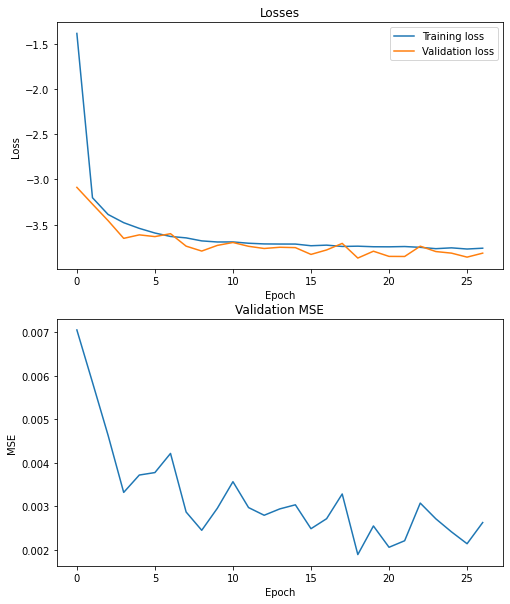

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

ax[0].plot(history["trainlosses"], label="Training loss")
ax[0].plot(history["validlosses"], label="Validation loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_title("Losses")
ax[0].legend()

ax[1].plot(history["validmses"]) 
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("MSE")
ax[1].set_title("Validation MSE")

fig.show()

In [4]:
testset = CelebA("data", "test", download=False, transform=transforms.Compose([transforms.Resize((64,64)), transforms.ToTensor()]))
testloader = DataLoader(testset, 8, shuffle=True)

In [5]:
model.eval()
original = next(iter(testloader))[0]

erased_rect, mask_rect = mask_rectangle(original, (0.1, 0.1), (1 / 3, 3))
erased_rand, mask_rand = mask_random(original, 0.1)

inpainted_rect_mean, inpainted_rect_std = model(erased_rect, mask_rect)
inpainted_rand_mean, inpainted_rand_std = model(erased_rand, mask_rand)

mse_rand = ((original - inpainted_rand_mean) ** 2).mean()

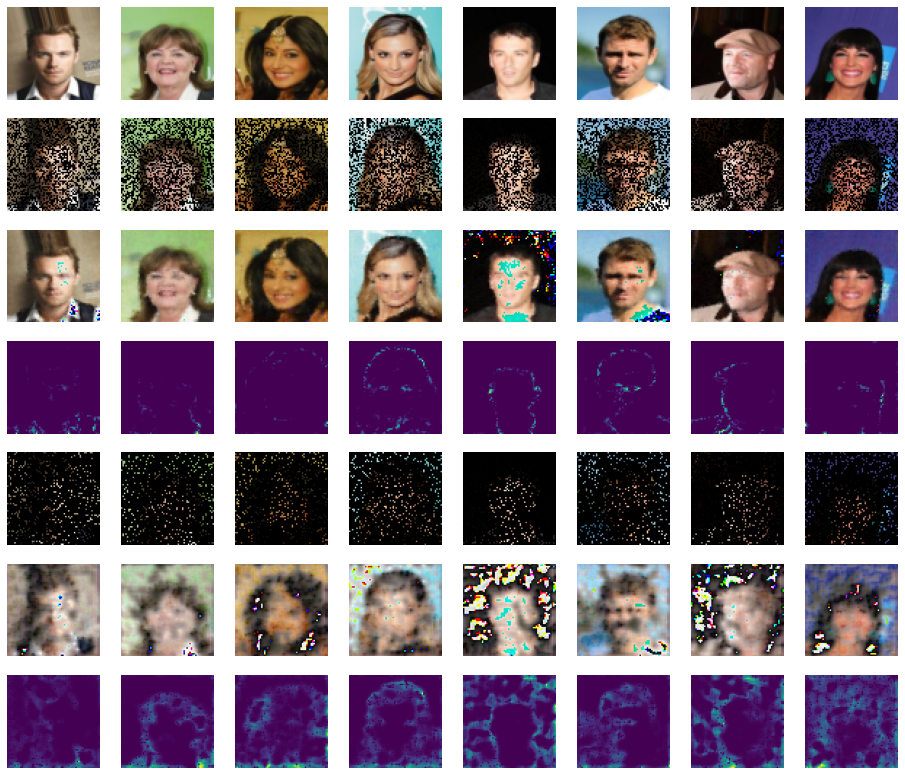

In [6]:
fig, ax = plt.subplots(7, 8, figsize=(16, 14))
for i in range(8):
    ax[0, i].imshow(to_pil_image(original[i]))
    ax[1, i].imshow(to_pil_image(erased_rect[i]))
    ax[2, i].imshow(to_pil_image(inpainted_rect_mean[i]))
    ax[3, i].imshow(to_pil_image(inpainted_rect_std[i].mean(0)))
    ax[4, i].imshow(to_pil_image(erased_rand[i]))   
    ax[5, i].imshow(to_pil_image(inpainted_rand_mean[i]))
    ax[6, i].imshow(to_pil_image(inpainted_rand_std[i].mean(0)))

[p.set_axis_off() for p in ax.ravel()]
plt.show()